In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Read the data
data = pd.read_csv(r"./ks_rlwe0.csv")
data

,I,N,initial_noise,noise
0,12,480,0.005518,0.231357
1,13,480,0.002771,0.120466
2,14,480,0.001354,0.063651
3,15,480,0.000693,0.032996
4,16,480,0.000340,0.016582
5,17,480,0.000172,0.008671
6,18,480,0.000084,0.004510
7,19,480,0.000043,0.002321
8,20,480,0.000022,0.001162
9,21,480,0.000011,0.000604


In [47]:
# initial noise treatment
initial_noise_mean = (data['initial_noise'] * data['I'].apply(lambda x:2**x)).mean() / 4
N = (2**5) * (3**1) * (5**1)

X = np.arange(12, 21.5, 0.1)
const = 3
Y = const * np.sqrt(N * X) * (initial_noise_mean / (2**X))
X = 2**X

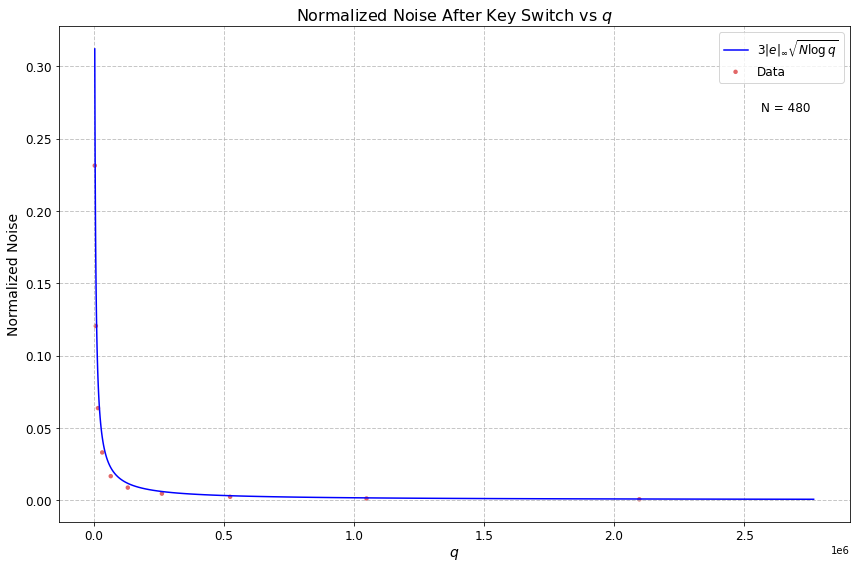

In [ ]:
Q = data['I'].apply(lambda x: 2**x)[:10]
noise = data['noise'][:10]
N = data['N'].iloc[0]

# Create plot
plt.figure(figsize=(12, 8))
plt.text(0.95, 0.85, f'N = {N}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', horizontalalignment='right')
plt.plot(X, Y, color='blue', label=f'Error bound: {const}'+'$\|e\|_\infty\sqrt{N \log{q}}$')
plt.scatter(Q, noise, s=20, color='tab:red', alpha=0.7, edgecolors='none', label='Error measured')

# Axis labels
plt.xlabel(r'$q$', fontsize=14)
plt.ylabel('Normalized Noise', fontsize=14)

# Title
plt.title('Normalized Noise After Key Switch vs $q$', fontsize=16)

# Grid (both major and minor)
plt.grid(True, which='both', linestyle='--', linewidth=1, alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(fontsize=12)

# Layout
plt.tight_layout()
plt.savefig("key_switch.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# Read the data
data = pd.read_csv(r"./ks_rlwe2.csv")
data

,q,N,initial_noise,noise
0,1048576,60,0.000016,0.000278
1,1048576,120,0.000018,0.000470
2,1048576,240,0.000020,0.000752
3,1048576,480,0.000022,0.001178
4,1048576,960,0.000023,0.001842
5,1048576,1920,0.000024,0.002766


In [75]:
# initial noise treatment
initial_noise_mean = (data['initial_noise'] * data['q']).mean() / 4
Q = data['q'].iloc[0]

X = np.arange(60, 1921, 0.1)
const = 4
Y = const * np.sqrt(X * np.log(Q)) * (initial_noise_mean / Q)

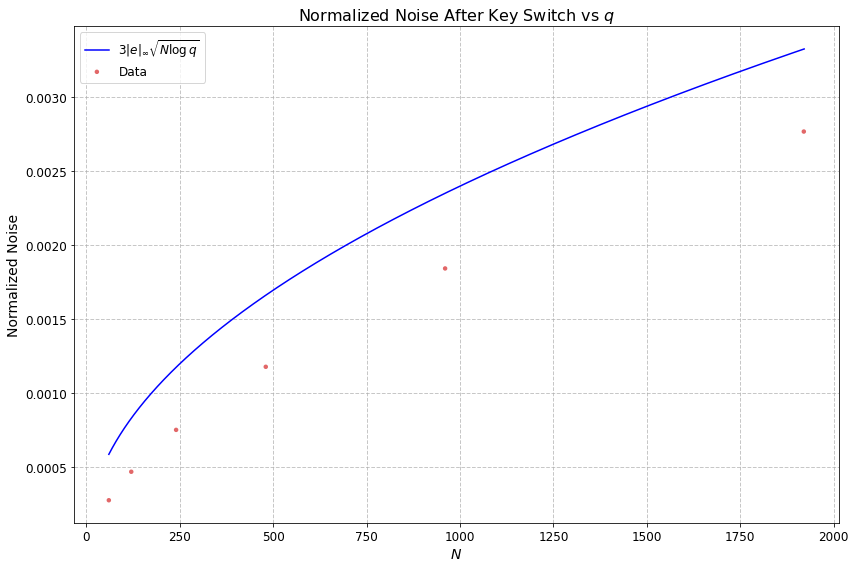

In [ ]:
N = data['N']
noise = data['noise']

# Create plot
plt.figure(figsize=(12, 8))
#plt.text(0.95, 0.85, f'q = {Q}', transform=plt.gca().transAxes,fontsize=12, verticalalignment='top', horizontalalignment='right')
plt.plot(X, Y, color='blue', label=f'Error bound: {const}'+'$\|e\|_\infty\sqrt{N \log{q}}$')
plt.scatter(N, noise, s=20, color='tab:red', alpha=0.7, edgecolors='none', label='Error measured')

# Axis labels
plt.xlabel(r'$N$', fontsize=14)
plt.ylabel('Normalized Noise', fontsize=14)

# Title
plt.title('Normalized Noise After Key Switch vs $q$', fontsize=16)

# Grid (both major and minor)
plt.grid(True, which='both', linestyle='--', linewidth=1, alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(fontsize=12)

# Layout
plt.tight_layout()
plt.savefig("key_switch.png", dpi=300, bbox_inches='tight')
plt.show()


In [85]:
from sklearn.linear_model import LinearRegression

# Example arrays
x = np.array(data['N'].apply(lambda x:np.log(x)))
y = np.array(data['noise'].apply(lambda x:np.log(x)))

# Reshape x for sklearn
x_reshaped = x.reshape(-1, 1)

# Fit linear model
model = LinearRegression().fit(x_reshaped, y)

# Get R^2 score
r_squared = model.score(x_reshaped, y)
r_squared

0.9983545883599313

In [86]:
model.coef_[0], model.intercept_

(0.6612941759273595, -10.849567610075479)